# **_QR Decomposition: Manipulation, Inverse, Validation_**

_Take the Identity Matrix and add/subtract a Rank 1 Matrix (formed from two vectors) of — a.k.a. a Rank-1 Update. Factor with QR decomposition, reconstruct, verify the inverse. Run numerical and visual checks._

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Intro:_**

This notebook demonstrates concepts from coding challenges I studied in Mike X. Cohen's Linear Algebra course on Udemy.

Essentially, this is my homework, which serves as a step-by-step review and a future quick-reference.

Visit Dr. Cohen's course here:

-   [**_Udemy Course_**](https://www.udemy.com/course/linear-algebra-theory-and-implementation)

-   [**_Mike X. Cohen's Website_**](https://www.mikexcohen.com/)

This course has helped not only with Linear Algebra, but has significantly improved my coding skills.

I'm still moving forward, slowly, toward the goal of contributing to the AI Safety conversation.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


## **_Goals:_**

1. Create two random vectors of equal length.

    - Use the **Sherman-Morrison formula** to construct matrix `M` and its inverse `N`.

2. Decompose `M` and `N` into their **orthogonal (`Q`)** and **upper-triangular (`R`)** components.

    - Validate that these components satisfy QR decomposition properties.

3. Reconstruct the inverses of `M` and `N` using the derived identity:  
   $A^{-1} = R^{-1} Q^T$

4. Recover the original `M` and `N` by inverting these results with NumPy’s built-in method.

5. Confirm reconstruction by checking that the current $A^T A$ equals Step 2's $R^T R$.

6. Finally, confirm that the current `M` and `N` are still **true inverses** of one another.  
   Design and run a few different tests to verify.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


## **_Quick Review:_**

**_1. Decomposing a matrix `A` breaks it into two parts:_**

1. Matrix `Q` an orthogonalized version of `A`.

2. Matrix `R`, an upper-triangular matrix `R`. Multiply `Q` by `R` to recreate `A`.

Use NumPy's `np.linalg.qr()` to get these parts.

**_2. By definition, a matrix times its inverse equals the identity matrix:_**

$A A^{-1} = I$

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


## **_Theory and Implementation with Code:_**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

#### **_1. Start with vectors `a` and `b`:_**

Using the **Sherman-Morrison formula**, compute a modified identity matrix and its inverse.

Let:

- $M = I - \mathbf{ab}^T$
- $N = I + \dfrac{\mathbf{ab}^T}{1 - \mathbf{a}^T \mathbf{b}}$

Here, $M$ is the original matrix, and $N$ is its inverse.

In [3]:
# 1. Start with vectors a and b:
n = np.random.randint(2, 11)
a = np.random.randn(n)
b = np.random.randn(n)

In [4]:
# Build the formula's components:
# Calculate the Sherman-Morrison formula:
I = np.eye(n)
outer_ab = np.outer(a, b)
dot_ab = np.dot(a, b)
denom = 1 - np.dot(a, b)

**_Caveat:_**

Sherman-Morrison breaks down if $\mathbf{a}^T \mathbf{b} \approx 1$.

Since $1 - \mathbf{a}^T \mathbf{b}$ appears in the denominator of the second equation,  
is safe to proceed only if this value is **not equal to 0** (or very close to it).

This situation occurs when `a` and `b` are nearly aligned and are both unit vectors. In that case their dot product approaches 1.

So I'll include this failsafe:

In [5]:
# Regenerate vectors until stable:
dot_ab = np.dot(a, b)
denom = 1 - dot_ab

while np.isclose(denom, 0):
    print("Numerical instability detected: 1 - a.T b about equal to 0.")
    print("Reinitializing vectors and recomputing...")
    n = np.random.randint(2, 11)
    a = np.random.randn(n)
    b = np.random.randn(n)
    I = np.eye(n)
    outer_ab = np.outer(a, b)
    dot_ab = np.dot(a, b)
    denom = 1 - dot_ab

In [6]:
# Calculate the Sherman-Morrison formula:
I = np.eye(n)
M1 = I - outer_ab
N1 = I + (outer_ab / (1 - dot_ab))

In [7]:
# Quick validation in medias res:
print(np.allclose(M1, np.linalg.inv(N1)))

True


<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

#### **_2. Decompose $M$ and $N$ using `np.linalg.qr()`:_**

Compute QR decompositions:

$$
\LARGE
\begin{aligned}
M &= Q_m R_m \\
N &= Q_n R_n
\end{aligned}
$$

Pick two random rows each from the $Q$ matrices, plot to verify orthogonality.

Plot $R$ matrices to verify they're _upper-triangular_.

In [8]:
# 2. Decompose M and N using `np.linalg.qr()`:
Q_m, R_m = np.linalg.qr(M1)
Q_n, R_n = np.linalg.qr(N1)

##### **_Using four ways to verify `Q_m` and `Q_n` orthogonality:_**

**_Built-In Method:_**

In [9]:
# 1. Quick orthogonality check with built-in method, O(1):
Q_m_is_orthogonal = np.allclose(Q_m.T @ Q_m, np.eye(n))
print(Q_m_is_orthogonal)
Q_n_is_orthogonal = np.allclose(Q_n.T @ Q_n, np.eye(n))
print(Q_n_is_orthogonal)

True
True


**_`dot_product == 0` Methods:_**

In [10]:
# 2. Sliding window orthogonality check (adjacent pairs only), O(n):
for i in range(n - 1):
    q_m_col1, q_m_col2 = Q_m[:, i], Q_m[:, i + 1]
    pairwise_dot = abs(np.round(np.dot(q_m_col1, q_m_col2), 13))
    print(f"Dot product for Q_m[:, {i}] and Q_m[:, {i + 1}] is {pairwise_dot}")
    q_n_col1, q_n_col2 = Q_n[:, i], Q_n[:, i + 1]
    pairwise_dot = abs(np.round(np.dot(q_n_col1, q_n_col2), 13))
    print(f"Dot product for Q_n[:, {i}] and Q_n[:, {i + 1}] is {pairwise_dot}")
    print()

Dot product for Q_m[:, 0] and Q_m[:, 1] is 0.0
Dot product for Q_n[:, 0] and Q_n[:, 1] is 0.0

Dot product for Q_m[:, 1] and Q_m[:, 2] is 0.0
Dot product for Q_n[:, 1] and Q_n[:, 2] is 0.0

Dot product for Q_m[:, 2] and Q_m[:, 3] is 0.0
Dot product for Q_n[:, 2] and Q_n[:, 3] is 0.0

Dot product for Q_m[:, 3] and Q_m[:, 4] is 0.0
Dot product for Q_n[:, 3] and Q_n[:, 4] is 0.0

Dot product for Q_m[:, 4] and Q_m[:, 5] is 0.0
Dot product for Q_n[:, 4] and Q_n[:, 5] is 0.0



In [11]:
# 3. Full pairwise orthogonality check via nested loops, O(n^2):
for i in range(n - 1):
    for j in range(i, n - 1):
        q_m_col1, q_m_col2 = Q_m[:, i], Q_m[:, j + 1]
        pairwise_dot = abs(np.round(np.dot(q_m_col1, q_m_col2), 13))
        print(f"Dot product for Q_m[:, {i}] and Q_m[:, {j + 1}] is {pairwise_dot}")
        q_n_col1, q_n_col2 = Q_n[:, i], Q_n[:, j + 1]
        pairwise_dot = abs(np.round(np.dot(q_n_col1, q_n_col2), 13))
        print(f"Dot product for Q_n[:, {i}] and Q_n[:, {j + 1}] is {pairwise_dot}")
        print()

Dot product for Q_m[:, 0] and Q_m[:, 1] is 0.0
Dot product for Q_n[:, 0] and Q_n[:, 1] is 0.0

Dot product for Q_m[:, 0] and Q_m[:, 2] is 0.0
Dot product for Q_n[:, 0] and Q_n[:, 2] is 0.0

Dot product for Q_m[:, 0] and Q_m[:, 3] is 0.0
Dot product for Q_n[:, 0] and Q_n[:, 3] is 0.0

Dot product for Q_m[:, 0] and Q_m[:, 4] is 0.0
Dot product for Q_n[:, 0] and Q_n[:, 4] is 0.0

Dot product for Q_m[:, 0] and Q_m[:, 5] is 0.0
Dot product for Q_n[:, 0] and Q_n[:, 5] is 0.0

Dot product for Q_m[:, 1] and Q_m[:, 2] is 0.0
Dot product for Q_n[:, 1] and Q_n[:, 2] is 0.0

Dot product for Q_m[:, 1] and Q_m[:, 3] is 0.0
Dot product for Q_n[:, 1] and Q_n[:, 3] is 0.0

Dot product for Q_m[:, 1] and Q_m[:, 4] is 0.0
Dot product for Q_n[:, 1] and Q_n[:, 4] is 0.0

Dot product for Q_m[:, 1] and Q_m[:, 5] is 0.0
Dot product for Q_n[:, 1] and Q_n[:, 5] is 0.0

Dot product for Q_m[:, 2] and Q_m[:, 3] is 0.0
Dot product for Q_n[:, 2] and Q_n[:, 3] is 0.0

Dot product for Q_m[:, 2] and Q_m[:, 4] is 0.0
Dot

In [12]:
# 4. Full pairwise dot products using itertools.combinations, cleaner O(n^2):
from itertools import combinations

for i, j in combinations(range(n), 2):
    dp_m = abs(np.round(np.dot(Q_m[:, i], Q_m[:, j]), 13))
    dp_n = abs(np.round(np.dot(Q_n[:, i], Q_n[:, j]), 13))
    print(f"Q_m[:, {i}] ⋅ Q_m[:, {j}] = {dp_m}")
    print(f"Q_n[:, {i}] ⋅ Q_n[:, {j}] = {dp_n}")
    print()

Q_m[:, 0] ⋅ Q_m[:, 1] = 0.0
Q_n[:, 0] ⋅ Q_n[:, 1] = 0.0

Q_m[:, 0] ⋅ Q_m[:, 2] = 0.0
Q_n[:, 0] ⋅ Q_n[:, 2] = 0.0

Q_m[:, 0] ⋅ Q_m[:, 3] = 0.0
Q_n[:, 0] ⋅ Q_n[:, 3] = 0.0

Q_m[:, 0] ⋅ Q_m[:, 4] = 0.0
Q_n[:, 0] ⋅ Q_n[:, 4] = 0.0

Q_m[:, 0] ⋅ Q_m[:, 5] = 0.0
Q_n[:, 0] ⋅ Q_n[:, 5] = 0.0

Q_m[:, 1] ⋅ Q_m[:, 2] = 0.0
Q_n[:, 1] ⋅ Q_n[:, 2] = 0.0

Q_m[:, 1] ⋅ Q_m[:, 3] = 0.0
Q_n[:, 1] ⋅ Q_n[:, 3] = 0.0

Q_m[:, 1] ⋅ Q_m[:, 4] = 0.0
Q_n[:, 1] ⋅ Q_n[:, 4] = 0.0

Q_m[:, 1] ⋅ Q_m[:, 5] = 0.0
Q_n[:, 1] ⋅ Q_n[:, 5] = 0.0

Q_m[:, 2] ⋅ Q_m[:, 3] = 0.0
Q_n[:, 2] ⋅ Q_n[:, 3] = 0.0

Q_m[:, 2] ⋅ Q_m[:, 4] = 0.0
Q_n[:, 2] ⋅ Q_n[:, 4] = 0.0

Q_m[:, 2] ⋅ Q_m[:, 5] = 0.0
Q_n[:, 2] ⋅ Q_n[:, 5] = 0.0

Q_m[:, 3] ⋅ Q_m[:, 4] = 0.0
Q_n[:, 3] ⋅ Q_n[:, 4] = 0.0

Q_m[:, 3] ⋅ Q_m[:, 5] = 0.0
Q_n[:, 3] ⋅ Q_n[:, 5] = 0.0

Q_m[:, 4] ⋅ Q_m[:, 5] = 0.0
Q_n[:, 4] ⋅ Q_n[:, 5] = 0.0



#### **_Confirm `R` matrices are upper-triangular:_**

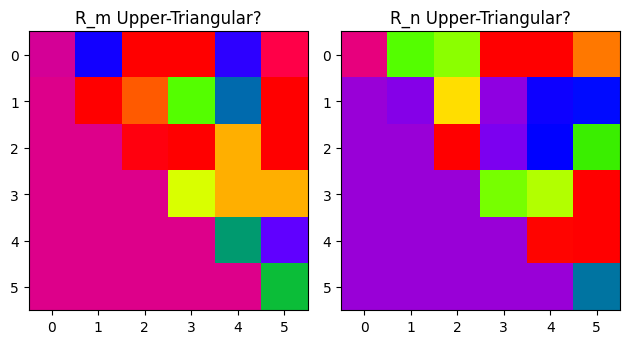

In [13]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(R_m, cmap="prism")
ax[0].set_title("R_m Upper-Triangular?")
ax[1].imshow(R_n, cmap="prism")
ax[1].set_title("R_n Upper-Triangular?")

plt.tight_layout()
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

#### **_3. Construct inverses using $R^{-1} Q^T$:_**

From:

$$
\large
\begin{gathered}
A = QR
\\ \Downarrow \\
A^{-1} = (QR)^{-1}
\\ \Downarrow \\
A^{-1} = R^{-1} Q^{-1}
\\ \Downarrow \\
A^{-1} = R^{-1} Q^T \quad \text{(since } Q \text{ is orthogonal)}
\end{gathered}
$$

Reconstruct:

$$
\LARGE
\begin{aligned}
M^{-1} &= R_m^{-1} Q_m^T \\
N^{-1} &= R_n^{-1} Q_n^T
\end{aligned}
$$

Avoid calling `np.linalg.inv()` directly on $M$ or $N$. Instead, invert $R$ using `solve()` or an equivalent triangular solver.

In [14]:
M_inv = np.linalg.solve(R_m, Q_m.T)
N_inv = np.linalg.solve(R_n, Q_n.T)

In [15]:
# Quick validation in medias res:
print(np.allclose(M_inv, np.linalg.inv(N_inv)))

True


<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

#### **_4. Validate by re-inverting:_**

Use `np.linalg.inv()` to invert the constructed $M^{-1}$ and $N^{-1}$ back to $M$ and $N$.

This step ensures the QR-based inverse reconstruction was correct.

In [16]:
M2 = np.linalg.inv(M_inv)
N2 = np.linalg.inv(N_inv)

In [17]:
# Quickly check M1==M2 and N1==N2:
print(np.allclose(M1, M2))
print(np.allclose(N1, N2))

True
True


In [18]:
# Quick validation in medias res:
print(np.allclose(M2, np.linalg.inv(N2)))

True


<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

#### **_5. Compare $A^T A$ to $R^T R$:_**

Given:

$$
\large
A^T A = (QR)^T (QR) = R^T Q^T Q R = R^T R
$$

Therefore:

$$
\LARGE
\begin{aligned}
M^T M &= R_m^T R_m \\
N^T N &= R_n^T R_n
\end{aligned}
$$

Use the $R$ matrices from **Step 2** and check whether the identities hold with the current $M$ and $N$.

In [19]:
print(np.allclose(M2.T @ M2, R_m.T @ R_m))
print(np.allclose(N2.T @ N2, R_n.T @ R_n))

True
True


<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

#### **_6. Final checks:_**

If **Step 5** is successful, confirm that $MN \approx I \; \text{and} \; NM \approx I$ with a variety of numerical and visual tests.

Initiate other tests to look at the results through different lenses.

In [20]:
I = np.eye(n)

In [21]:
# All combinations should equal I, return True:
print(np.allclose(M1 @ N1, I))
print(np.allclose(M1 @ N2, I))
print(np.allclose(M2 @ N1, I))
print(np.allclose(M2 @ N2, I))

True
True
True
True


In [22]:
# All combinations should return easily identifiable
#  Identity Matrices:
print(np.round(M1 @ N1, 13))
print(np.round(M1 @ N2, 13))
print(np.round(M2 @ N1, 13))
print(np.round(M2 @ N2, 13))

[[ 1.  0.  0.  0. -0.  0.]
 [ 0.  1.  0.  0. -0. -0.]
 [ 0.  0.  1. -0. -0. -0.]
 [ 0.  0.  0.  1.  0. -0.]
 [ 0. -0.  0. -0.  1.  0.]
 [-0.  0. -0. -0.  0.  1.]]
[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0. -0.  0.  0.]
 [-0.  0.  1. -0. -0.  0.]
 [ 0.  0. -0.  1. -0. -0.]
 [-0. -0.  0. -0.  1.  0.]
 [ 0.  0. -0. -0. -0.  1.]]
[[ 1.  0. -0. -0. -0. -0.]
 [-0.  1.  0. -0. -0. -0.]
 [-0. -0.  1. -0. -0.  0.]
 [ 0.  0.  0.  1. -0.  0.]
 [-0.  0. -0. -0.  1.  0.]
 [ 0.  0. -0.  0.  0.  1.]]
[[ 1.  0.  0.  0. -0.  0.]
 [-0.  1.  0. -0. -0.  0.]
 [-0. -0.  1. -0. -0.  0.]
 [ 0.  0. -0.  1. -0. -0.]
 [-0.  0.  0. -0.  1.  0.]
 [ 0. -0. -0.  0. -0.  1.]]


In [23]:
# Different combinations should correlate perfectly:
print(np.corrcoef(M1.flatten(), M2.flatten()))
print(np.corrcoef(np.linalg.inv(M2).flatten(), M_inv.flatten()))
print(np.corrcoef(np.linalg.inv(N2).flatten(), N_inv.flatten()))

[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]


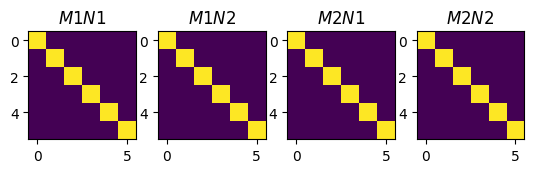

In [24]:
# Should all display descending diagonal stripes
#  in indicating the Identity Matrix:
plt.subplot(1, 4, 1)
plt.imshow(M1 @ N1)
plt.title("$M1 N1$")

plt.subplot(1, 4, 2)
plt.imshow(M1 @ N2)
plt.title("$M1 N2$")

plt.subplot(1, 4, 3)
plt.imshow(M2 @ N1)
plt.title("$M2 N1$")

plt.subplot(1, 4, 4)
plt.imshow(M2 @ N2)
plt.title("$M2 N2$")

plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


## **_Takeaway:_**

Mike X. Cohen's course has helped me learn, practice and reinforce the multitude of operations possible to exert upon matrices and vectors.

This section had me taking things apart and putting them back together, and has me feeling much more confident in my abilities around these mathematical concepts and coding.

QR Decomposition seems to open a world of possibilities, like taking an engine apart to examine its components.

The subject has been very slow and challenging for me to learn, but I'm continuing to grind through...

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 70%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px orangered; width: 60%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 50%;">


<font size=2>

_Andrew Blais, Boston, Massachusetts_

[**_GitHub_**](https://github.com/andrewblais)

[**_Website_**](https://wateronchair.com/)

</font>